<a href="https://colab.research.google.com/github/ademiltonnunes/Machine-Learning/blob/main/Random_Forest/randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Random Forest**

In [37]:
! jupyter nbconvert --to html randomForest.ipynb

[NbConvertApp] Converting notebook randomForest.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/jupyter_core/application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/nbconvertapp.py", line 488, 

#Creating a decision Tree Example

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

Decision tree is a way to classify or label objects.

Example of a tree bellow

In [ ]:
!git clone https://github.com/jakevdp/sklearn_pycon2015.git

fatal: destination path 'sklearn_pycon2015' already exists and is not an empty directory.


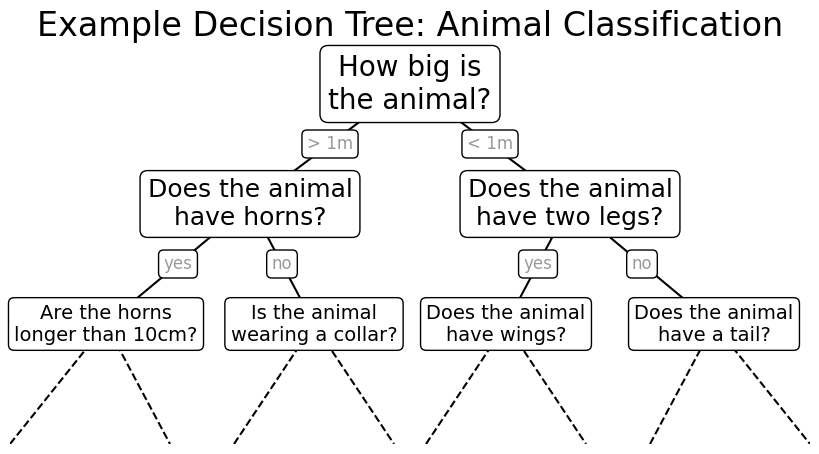

In [ ]:
from sklearn_pycon2015.notebooks import fig_code
fig_code.plot_example_decision_tree()

Data to create the tree

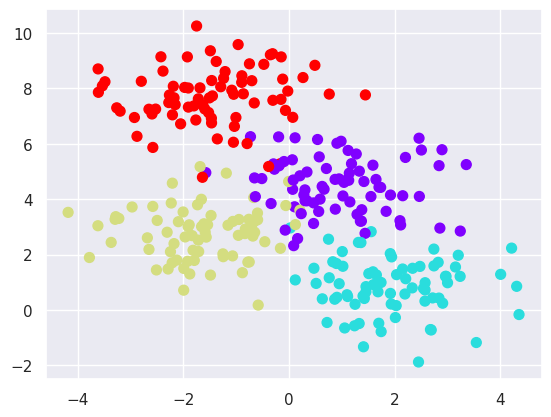

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

/usr/local/lib/python3.9/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


interactive(children=(Dropdown(description='depth', options=(1, 5), value=1), Output()), _dom_classes=('widget…

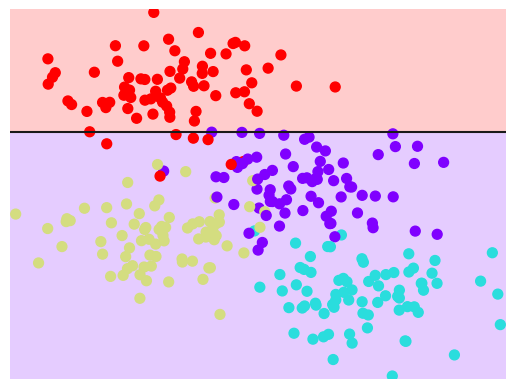

In [ ]:
# We have some convenience functions in the repository that help 
from sklearn_pycon2015.notebooks.fig_code import visualize_tree, plot_tree_interactive
# from fig_code import visualize_tree, plot_tree_interactive


# Now using IPython's ``interact`` (available in IPython 2.0+, and requires a live kernel) we can view the decision tree splits:
plot_tree_interactive(X, y);

#Issue with decision tree is the over-fit data

<Figure size 640x480 with 0 Axes>

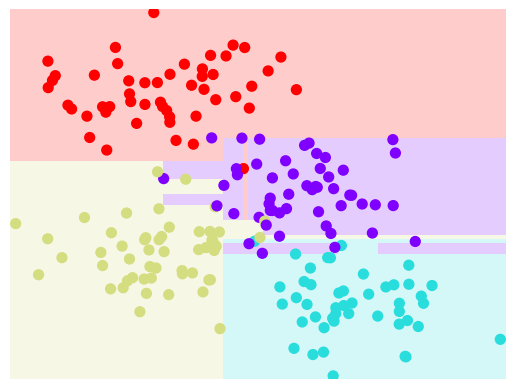

<Figure size 640x480 with 0 Axes>

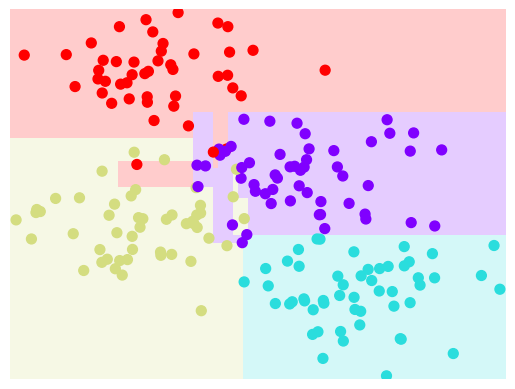

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

#Random forest

Random forest is a Ensemble Method that results are robust and accurate than the individual estimates. It is made up of many decision trees which are in some way perturbed.

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

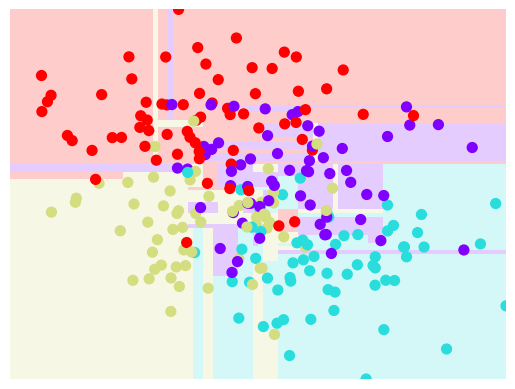

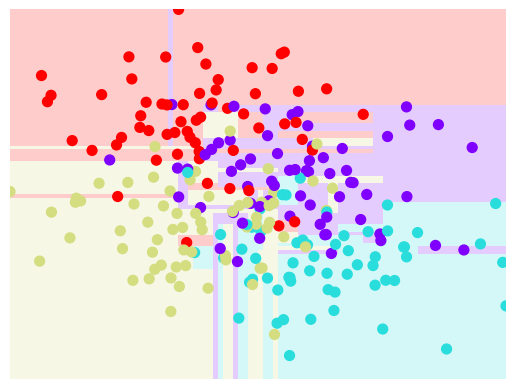

In [ ]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0, 100]);

By averaging over 100 randomly perturbed models, we end up with an overall model which is a much better fit to our data!

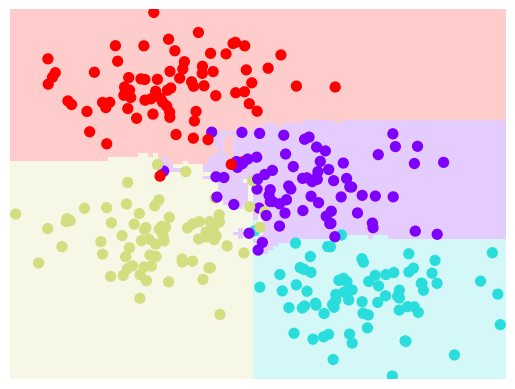

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
visualize_tree(clf, X, y, boundaries=False);

#Random Forest Regressor

 Random forests can also be made to work in the case of regression

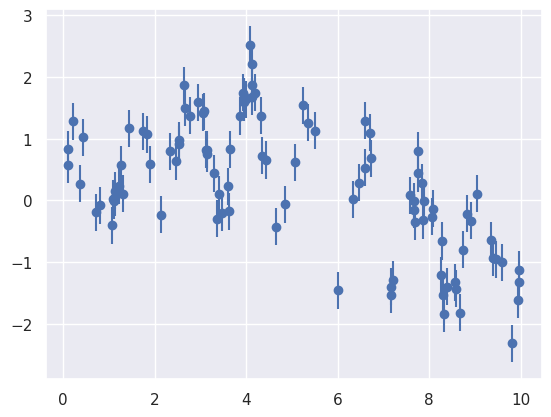

In [ ]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

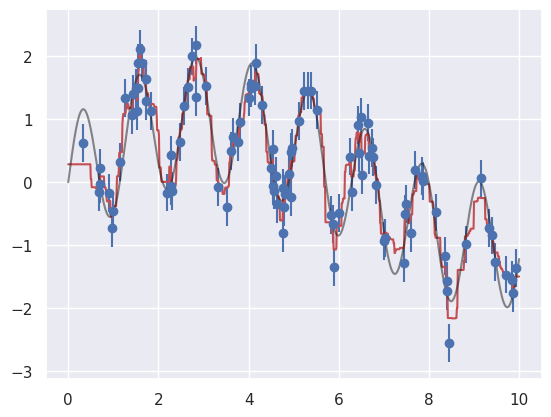

In [ ]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);